1.	Create a five level 'connections' graph (all unique, no duplicates).

o	The first level should have five people and each person in first level should have five connections (they can be exclusive to one person or shared with other members on the same level, but all five should be unique, no duplicates)

o	Each person in the second level should have five connections (they can be exclusive to one person or shared with other members on the same level, but all five should be unique, no duplicates)

o	Continue the same for third, fourth, and fifth levels

o	There should be no reverse connections (i.e. first level can connect to second level but second cannot have any reverse connection with the first, and so on for 3rd, 4th, and 5th levels)

2.	Now search for three people on each level and capture the time for each search.

3.	Organize the results of the study into an table showing the 'name' that you searched for, the level of the search (first, second, third, fourth, fifth), and the time it took.  Discuss any findings.

4.	Using the average time for each level, create a plot and compare times at each level (five bars or any other suitable visual).  Discuss any findings.

Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook.  Explain how the algorithm works and why it is a useful to data engineers.


In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.style as style
from decimal import Decimal
import random
import string
import matplotlib.ticker as mtick
from collections import deque


from platform import python_version

print("python version",python_version())

import os
import platform


python version 3.8.5


# 1. Create a five level 'connections' graph (all unique, no duplicates).

# o The first level should have five people and each person in first level should have five connections (they can be exclusive to one person or shared with other members on the same level, but all five should be unique, no duplicates)

# o Each person in the second level should have five connections (they can be exclusive to one person or shared with other members on the same level, but all five should be unique, no duplicates)

# o Continue the same for third, fourth, and fifth levels

# o There should be no reverse connections (i.e. first level can connect to second level but second cannot have any reverse connection with the first, and so on for 3rd, 4th, and 5th levels)

# Alternate approach which gives the same result. (used)
# The only difference is how the graph dictionary is set up 
 
creating a graph in which all nodes have a unique names + root node.

root node is connected to level 1 nodes and each nodes in level 1 to 5 each node is connected to five unique nodes. creating 3905 unique nodes + 1 root node

level 0 = 1 root node 

level 1 = 5 nodes

level 2 = 25 nodes

level 3 = 125 nodes

level 4 = 625 nodes

level 5 = 3125 nodes

level 5: 3125 nodes are connected to an empty node

step 1:

create array for 3905 names

step 2 :

use list indexing and for loop to create a graph/dictionary object and a reference or metadata dictionary where key = level and values = names

In [2]:
# create array for 3905  5 string random names that will be used to create the 5 level graph 
random.seed(0)
array_name_3905 = [''.join(random.choices(string.ascii_letters, k = 5)) for _ in range(3905)]

In [3]:
# test for any duplicate value with set and len function
len(set(array_name_3905))

3905

In [4]:
# create an empty  dictonaty for graph 
graph = {}

# create 5 nodes for level 1 that connect to root node

# index the array_name_3905 list to create the names

graph["root"]= array_name_3905[:5]


# create  25 nodes for level 2


nodes ={} # create a dictonary to keep track of nodes and level

nodes[0]= ['root']

nodes[1] = []

i =0 
for a in range(5,30,5):
   
    graph[array_name_3905[i]] = array_name_3905[a:a+5] 
    i +=1
    nodes[1].append(array_name_3905[i])
    
# create 125 nodes for level 3

nodes[2] =[]
i = 5
for a in range(30,155, 5):
    graph[array_name_3905[i]] = array_name_3905[a:a+5] 
    i +=1
    nodes[2].append(array_name_3905[i])

# create  625 nodes for level 4

nodes[3] =[]
i = 30
for a in range(155,780,5):
    graph[array_name_3905[i]] = array_name_3905[a:a+5] 
    i +=1
    nodes[3].append(array_name_3905[i])
# create 3125 nodes for level 5

nodes[4] =[]
i = 155
for a in range(780,3905,5):
    graph[array_name_3905[i]] = array_name_3905[a:a+5] 
    i +=1
    nodes[4].append(array_name_3905[i])
    
# create end empty nodes for the level 5: 3125 nodes 
nodes[5] = []
for a in range(780,3905):
    graph[array_name_3905[a]] =[]
    nodes[5].append(array_name_3905[a])

In [5]:
# print level number and count of the nodes dictonary 
for key, value in nodes.items():
    #print value
    print({key: len([item for item in value if item])})

{0: 1}
{1: 5}
{2: 25}
{3: 125}
{4: 625}
{5: 3125}


In [6]:
#count the total nodes
len(graph)

3906

# 2.	Now search for three people on each level and capture the time for each search.

# create function for Breadth First Search (BFS)

In [7]:
# modified the sample code given it module 6 from Grokking Algorithms (Bhargava 2016)

def search(name):
    search_queue = deque()
    search_queue += graph["root"]
    #print("Adding to search queue:", search_queue)

    # This array is how you keep track of which people you've searched before.
    searched = []

    while search_queue:

        #print("search_queue now looks like this:", search_queue)

        person = search_queue.popleft()
        # Only search this person if you haven't already searched them.
        if person not in searched:

            #print("Searching", person)
            if person == name:       

        
                return True
            else:
                search_queue += graph[person]
                #print("  ", person, "is NOT a mango seller!\n   Adding to search queue:", graph[person])
                
                # Marks this person as searched
                searched.append(person)
                #print("Finished searching", person, ". Adding to searched list:", searched)
    return False



In [8]:
# create runtime function that take 2 arguments. array and sorting function 
def graph_search_time(name):
    start_time = time.perf_counter()
    search(name)
    run_time = time.perf_counter()- start_time
    return run_time

search 3 people on each level 

In [9]:
# store names of 3 people on level 1
random.seed(0)


level_one_names = random.sample(nodes[1], 3)

# store names of 3 people on level 2


level_two_names= random.sample(nodes[2], 3)


# store names of 3 people on level 3


level_three_names= random.sample(nodes[3], 3)

# store names of 3 people on level 4


level_four_names= random.sample(nodes[4], 3)

# store names of 3 people on level 5


level_five_names= random.sample(nodes[5], 3)


In [10]:
# create a nested list for all the the names
all_names = [level_one_names, level_two_names, level_three_names, level_four_names, level_five_names]

In [11]:
# use for loop to save level number and runtime for all the randomly selected people 

level = 1
run_time = []
for i in all_names:
    for a in i:
        run_time.append([level,a , graph_search_time(a)])
    level +=1
        

In [12]:
run_time

[[1, 'qLUJy', 5.499999999436511e-06],
 [1, 'fwFVY', 2.600000000185787e-06],
 [1, 'vOpyE', 1.000000000139778e-06],
 [2, 'jjFIy', 7.300000000043383e-06],
 [2, 'hKcDV', 1.09999999997612e-05],
 [2, 'lPrQf', 9.699999999668307e-06],
 [3, 'vQdHg', 7.550000000033918e-05],
 [3, 'ctkBj', 0.00018839999999986645],
 [3, 'UaBdT', 0.0001505000000001644],
 [4, 'qTmHM', 0.0015480999999999412],
 [4, 'Urvrn', 0.0028648000000002227],
 [4, 'NxktI', 0.0019049999999998235],
 [5, 'ZXPiN', 0.06666500000000042],
 [5, 'vnXOA', 0.018414700000000117],
 [5, 'lRHuf', 0.05285630000000019]]

# 3.	Organize the results of the study into an table showing the 'name' that you searched for, the level of the search (first, second, third, fourth, fifth), and the time it took.  Discuss any findings.

In [13]:
# create data frame that shows the graph/dict level and name  and runtume in milliseconds for BFS algorithm
table = pd.DataFrame(run_time, columns = ["Level", "Name", "Run_time"])
pd.set_option('display.float_format', '{:}'.format)
table

,Level,Name,Run_time
0,1,qLUJy,5.499999999436511e-06
1,1,fwFVY,2.600000000185787e-06
2,1,vOpyE,1.000000000139778e-06
3,2,jjFIy,7.300000000043383e-06
4,2,hKcDV,1.09999999997612e-05
5,2,lPrQf,9.699999999668307e-06
6,3,vQdHg,7.550000000033918e-05
7,3,ctkBj,0.00018839999999986645
8,3,UaBdT,0.0001505000000001644
9,4,qTmHM,0.0015480999999999412


Breadth first search starts at the tree root that is level 1 (5 nodes) and then explores all of the neighbor nodes at that depth prior to moving on to the nodes at the next depth level and continues so on.

The table shows that search for names on level 1 of the dictionary is extremely fast and then level 2 is still very fast but gets slower and slower at nodes 3, 4 and 5 as the edges and vertices (nodes) increase by a factor of 5. The deeper in the graph that the search had to go, the longer the search took.

 


# 4.	Using the average time for each level, create a plot and compare times at each level (five bars or any other suitable visual).  Discuss any findings.


In [14]:
# use pandas group by method to get average runtime for each graph level 

summary_table = table.groupby('Level').mean('Run_time').reset_index().set_index("Level")

summary_table.columns= ['Average Run time']

summary_table

,Average Run time
Level,
1,3.0333333332540255e-06
2,9.333333333157631e-06
3,0.00013813333333345668
4,0.0021059666666666623
5,0.04597866666666691


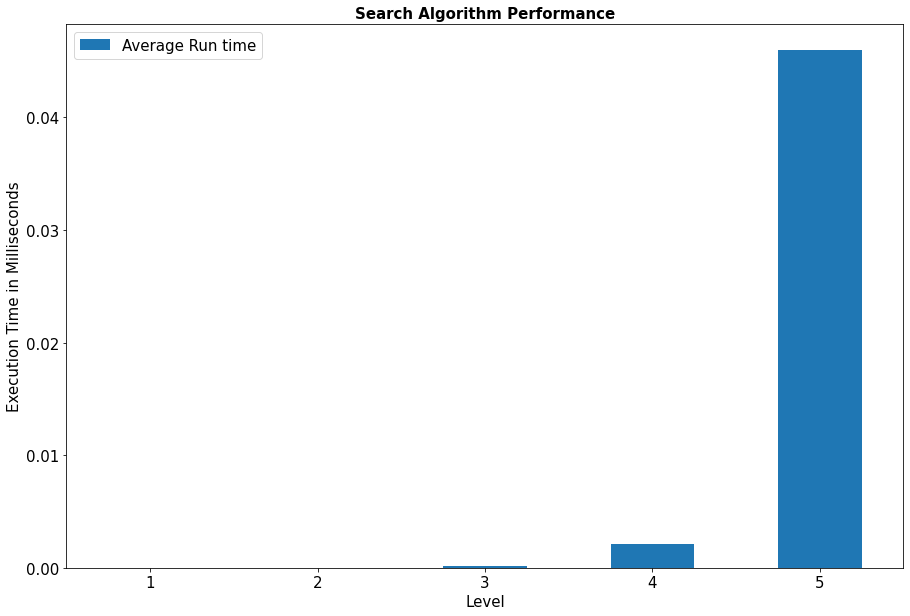

In [15]:

# plotting a bar plot to compare the average BFS runtime at the five levels
plt.rcParams["figure.figsize"] = (15,10)

ax = summary_table.plot(kind='bar',fontsize = 15)
ax.set_xlabel("Level", fontdict={'fontsize':15})
ax.set_ylabel("Execution Time in Milliseconds", fontdict={'fontsize':15})
ax.set_title("Search Algorithm Performance",fontweight="bold", size=15)
ax.set_xticklabels(summary_table.index ,rotation=360)
ax.legend(loc=2, fontsize=15)

plt.show(ax)

the above graph is extremely skewed to right. i will split the graph between level 1,2,3 and level 4,5

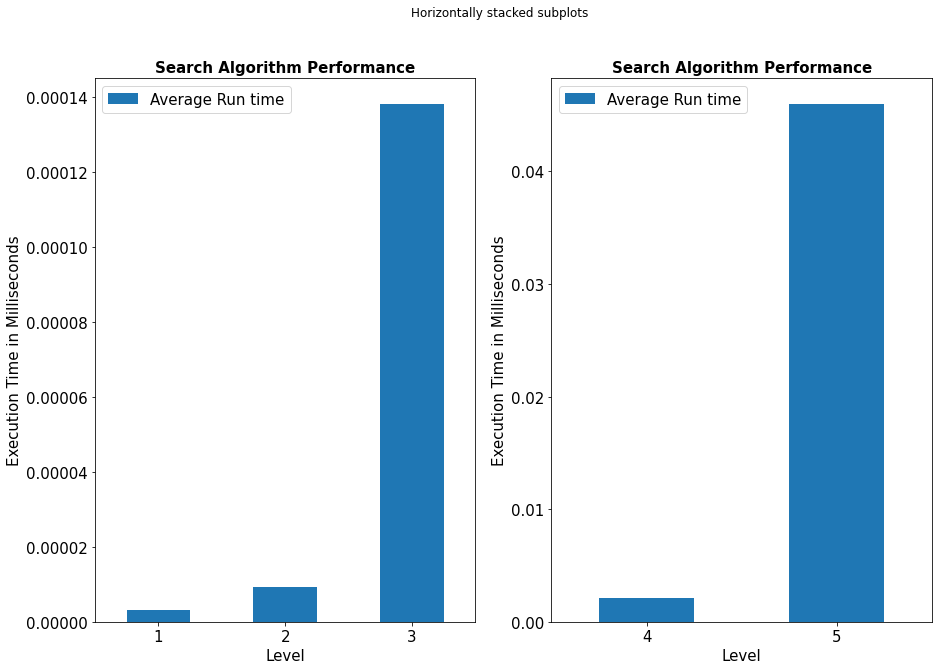

In [16]:
# split the graph to view average runtime of level 1,2 and 3 in one graph and level 4 and 5 in another graph in order 
# to get a better compariosn

plt.rcParams["figure.figsize"] = (15,10)

fig, (ax11, ax22) = plt.subplots(1, 2)

fig.suptitle('Horizontally stacked subplots')
ax1 = summary_table.iloc[:3].plot(ax= ax11,kind='bar',fontsize = 15)
ax1.set_xlabel("Level", fontdict={'fontsize':15})
ax1.set_ylabel("Execution Time in Milliseconds", fontdict={'fontsize':15})
ax1.set_title("Search Algorithm Performance",fontweight="bold", size=15)
ax1.set_xticklabels(summary_table.index[:3] , rotation=360)
ax1.legend(loc=2, fontsize=15)

ax2 = summary_table.iloc[3:5].plot(ax= ax22,kind='bar',fontsize = 15)
ax2.set_xlabel("Level", fontdict={'fontsize':15})
ax2.set_ylabel("Execution Time in Milliseconds", fontdict={'fontsize':15})
ax2.set_title("Search Algorithm Performance",fontweight="bold", size=15)
ax2.set_xticklabels(summary_table.index[3:5], rotation=360)
ax2.legend(loc=2, fontsize=15)
plt.show(ax1,ax2)

# Discussion and Executive Summary

The above graph and table confirms the Breadth-first search (BFS) time complexity of O(V +E). V and E represent vertices (Nodes) and edges in the graph, respectively. The graph I created was one directional with no overlapping vertices. 

BFS finds if a path to the searched item exists and finds the shortest path if it does.

BFS is a traversing algorithm which starts traversing from a source or starting node and traverses the graph layerwise or depth-wise, thus exploring the neighbor nodes (nodes which are directly connected to the source node) before moving on to the nodes at the next layer or depth level.

As a data engineer, it is essential to know how BFS works. The search is efficient when the graph is narrow and shallow but can get quite time- and memory-expensive for complex graphs that are wide and deep. It is important to know the structure of the graph before we can implement a BFS algorithm.


